In [1]:
%reset -f
import pandas as pd
import numpy as np
import copy
from collections import deque
from pandas.core.frame import DataFrame
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
data = pd.read_csv('C:\\Users\\w9012219\\Desktop\\Python\\0909 Esun\\total_set_1022.csv')

In [3]:
data.head(5)

,acqic,acqic1,acqic2,acqic3,bacno,cano,conam,conam1,conam2,conam3,...,scity3,stocn,stscd,sum_lag0,sum_lag1,sum_lag2,time_interval,time_weight,txkey,weekday
0,6032,NaN,NaN,NaN,116316,0,236.43,0.00,0.00,0.00,...,NaN,102,0,236.430000,0.000000,0.000000,15,0.03125,274548,1
1,6032,6032.0,NaN,NaN,116316,0,319.72,236.43,0.00,0.00,...,NaN,102,0,278.075000,236.430000,0.000000,15,0.03125,391141,4
2,6716,6032.0,6032.0,NaN,116316,0,1016.34,319.72,236.43,0.00,...,NaN,102,0,524.163333,278.075000,236.430000,14,0.03125,1131445,6
3,6032,6716.0,6032.0,6032.0,116316,0,272.12,1016.34,319.72,236.43,...,5817.0,102,0,461.152500,524.163333,278.075000,15,0.03125,426341,1
4,6032,6032.0,6716.0,6032.0,116316,0,283.91,272.12,1016.34,319.72,...,5817.0,102,0,425.704000,461.152500,524.163333,14,0.03125,399230,2


In [4]:
data.columns

Index(['acqic', 'acqic1', 'acqic2', 'acqic3', 'bacno', 'cano', 'conam',
       'conam1', 'conam2', 'conam3', 'conam_3rt', 'conam_3rt1', 'conam_3rt2',
       'conam_3rt3', 'conam_log', 'conam_log1', 'conam_log2', 'conam_log3',
       'contp', 'contp1', 'contp2', 'contp3', 'csmcu', 'csmcu1', 'csmcu2',
       'csmcu3', 'diff_log10', 'ecfg', 'etymd', 'flbmk', 'flg_3dsmk',
       'fraud_ind', 'hcefg', 'hcefg1', 'hcefg2', 'hcefg3', 'if_mor', 'if_mor1',
       'if_mor2', 'if_mor3', 'if_train', 'insfg', 'iterm', 'locdt', 'loctm',
       'mcc', 'mcc1', 'mcc2', 'mcc3', 'mcc_mode', 'mchno', 'mchno1', 'mchno2',
       'mchno3', 'ovrlt', 'ovrlt1', 'ovrlt2', 'ovrlt3', 'scity', 'scity1',
       'scity2', 'scity3', 'stocn', 'stscd', 'sum_lag0', 'sum_lag1',
       'sum_lag2', 'time_interval', 'time_weight', 'txkey', 'weekday'],
      dtype='object')

In [5]:
data.dtypes

acqic              int64
acqic1           float64
acqic2           float64
acqic3           float64
bacno              int64
                  ...   
sum_lag2         float64
time_interval      int64
time_weight      float64
txkey              int64
weekday            int64
Length: 71, dtype: object

In [6]:
from scipy import stats
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),5) 

    return summary

In [7]:
resumetable(data)

Dataset Shape: (1943472, 71)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,acqic,int64,0,6866,6032,6032,6716,5.14212
1,acqic1,float64,216223,6496,NaN,6032,6032,5.15113
2,acqic2,float64,392683,6151,NaN,NaN,6032,5.15883
3,acqic3,float64,541468,5803,NaN,NaN,NaN,5.16925
4,bacno,int64,0,163185,116316,116316,116316,16.40367
...,...,...,...,...,...,...,...,...
66,sum_lag2,float64,0,1172183,0,0,236.43,16.08633
67,time_interval,int64,0,24,15,15,14,4.26638
68,time_weight,float64,0,9,0.03125,0.03125,0.03125,1.15475
69,txkey,int64,0,1943452,274548,391141,1131445,20.89018


### SNS

In [8]:
train_set = data[data['if_train']==1]

In [9]:
df0 = train_set[train_set['fraud_ind']==0]
df1 = train_set[train_set['fraud_ind']==1]

In [10]:
df0.columns

Index(['acqic', 'acqic1', 'acqic2', 'acqic3', 'bacno', 'cano', 'conam',
       'conam1', 'conam2', 'conam3', 'conam_3rt', 'conam_3rt1', 'conam_3rt2',
       'conam_3rt3', 'conam_log', 'conam_log1', 'conam_log2', 'conam_log3',
       'contp', 'contp1', 'contp2', 'contp3', 'csmcu', 'csmcu1', 'csmcu2',
       'csmcu3', 'diff_log10', 'ecfg', 'etymd', 'flbmk', 'flg_3dsmk',
       'fraud_ind', 'hcefg', 'hcefg1', 'hcefg2', 'hcefg3', 'if_mor', 'if_mor1',
       'if_mor2', 'if_mor3', 'if_train', 'insfg', 'iterm', 'locdt', 'loctm',
       'mcc', 'mcc1', 'mcc2', 'mcc3', 'mcc_mode', 'mchno', 'mchno1', 'mchno2',
       'mchno3', 'ovrlt', 'ovrlt1', 'ovrlt2', 'ovrlt3', 'scity', 'scity1',
       'scity2', 'scity3', 'stocn', 'stscd', 'sum_lag0', 'sum_lag1',
       'sum_lag2', 'time_interval', 'time_weight', 'txkey', 'weekday'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

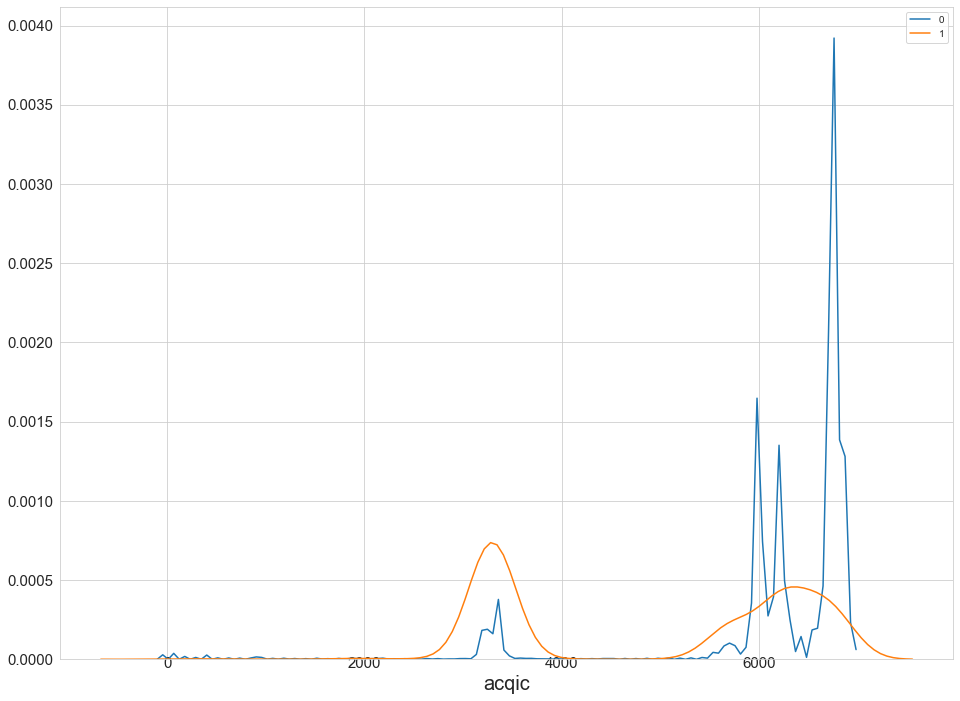

<Figure size 432x288 with 0 Axes>

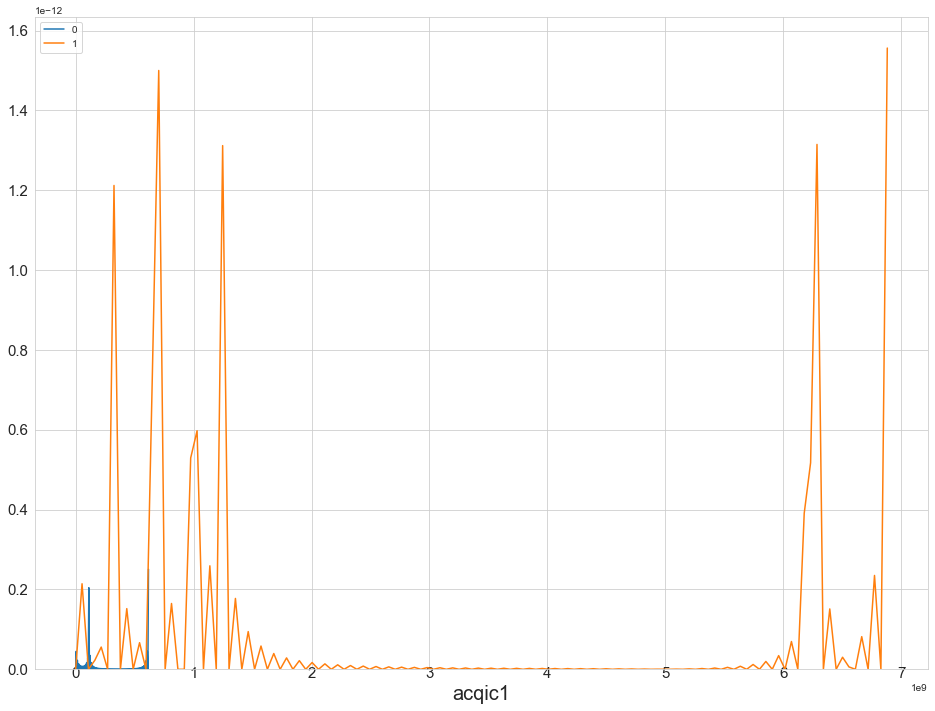

<Figure size 432x288 with 0 Axes>

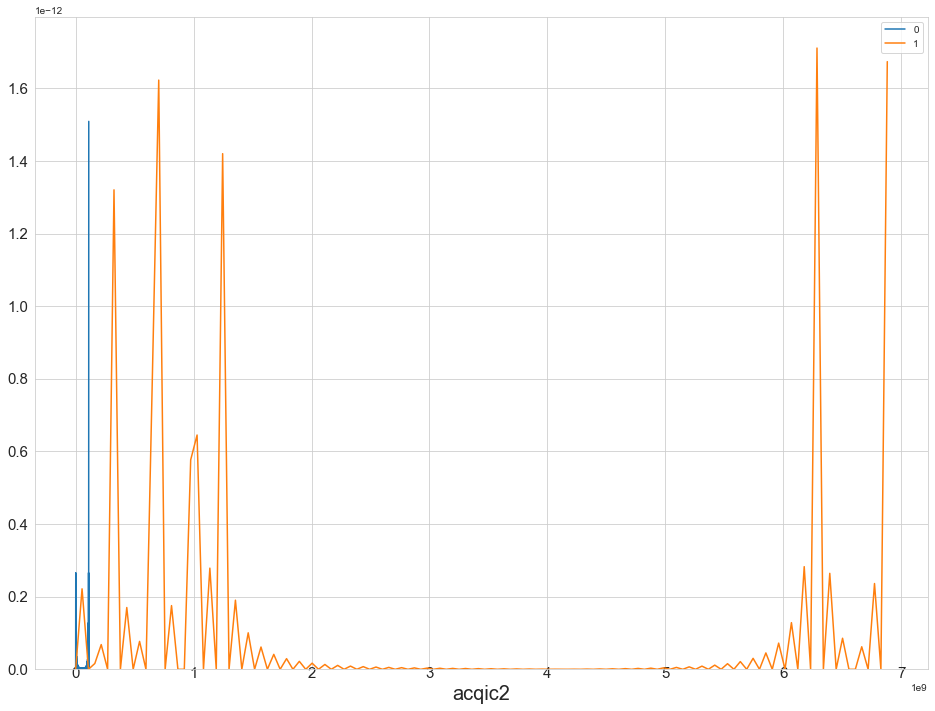

<Figure size 432x288 with 0 Axes>

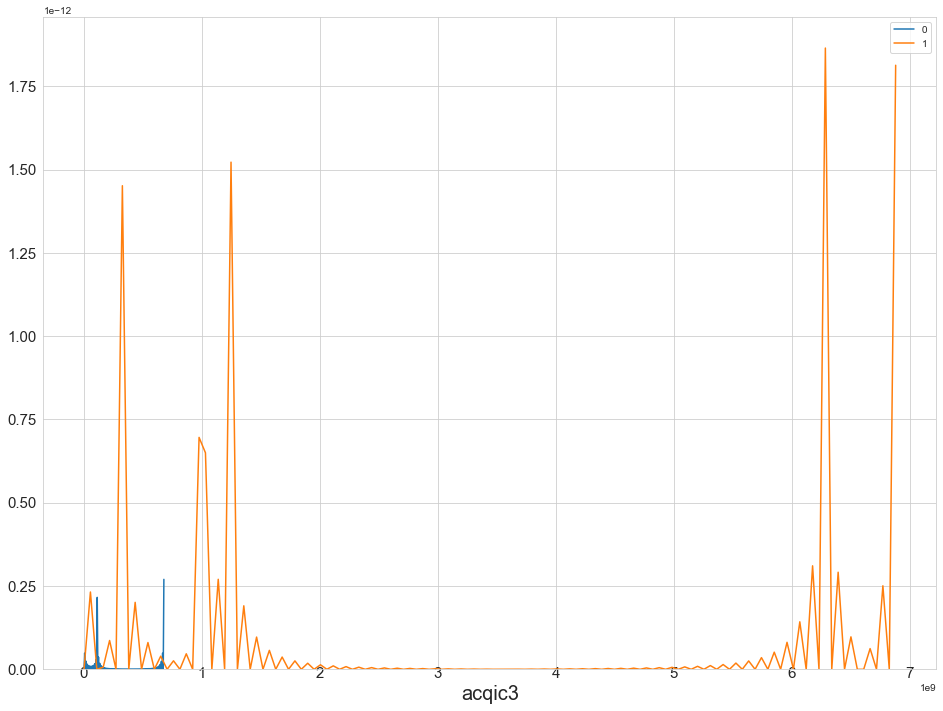

<Figure size 432x288 with 0 Axes>

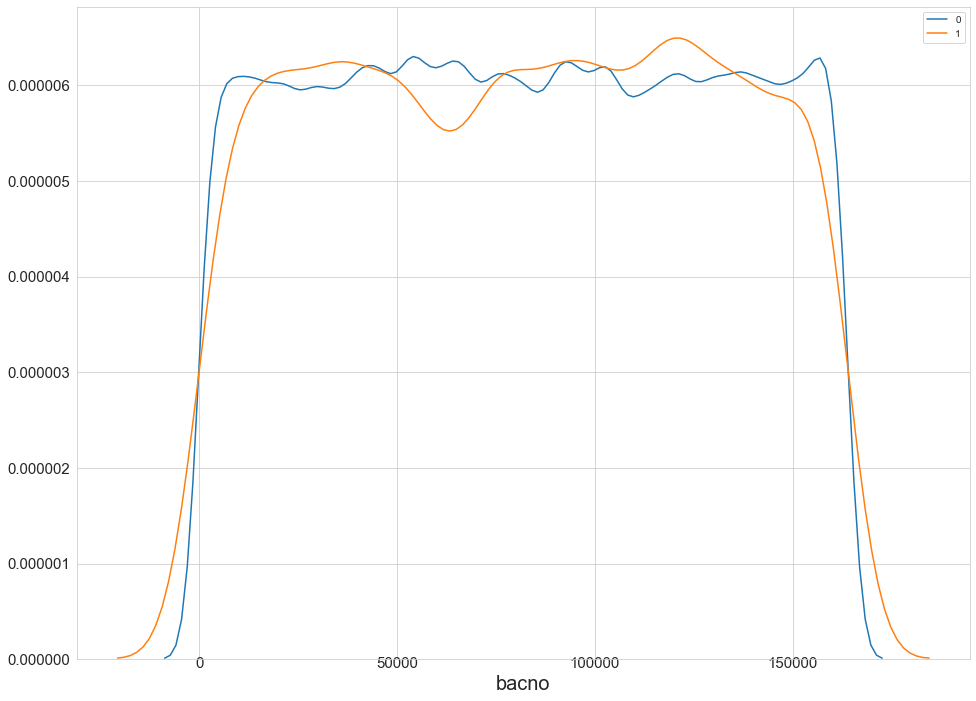

<Figure size 432x288 with 0 Axes>

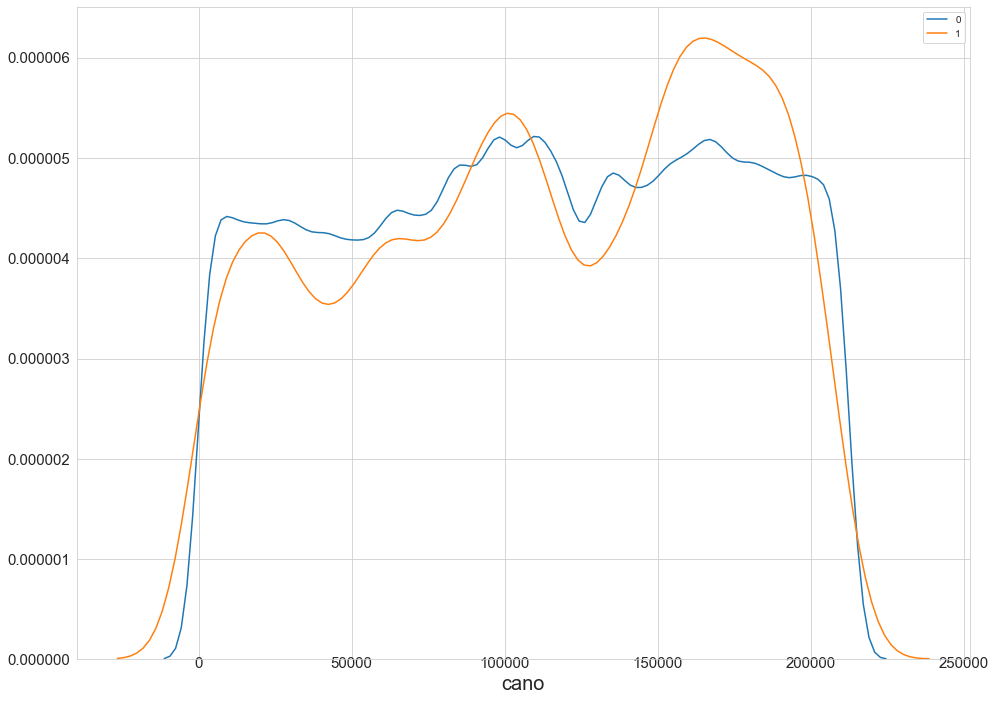

<Figure size 432x288 with 0 Axes>

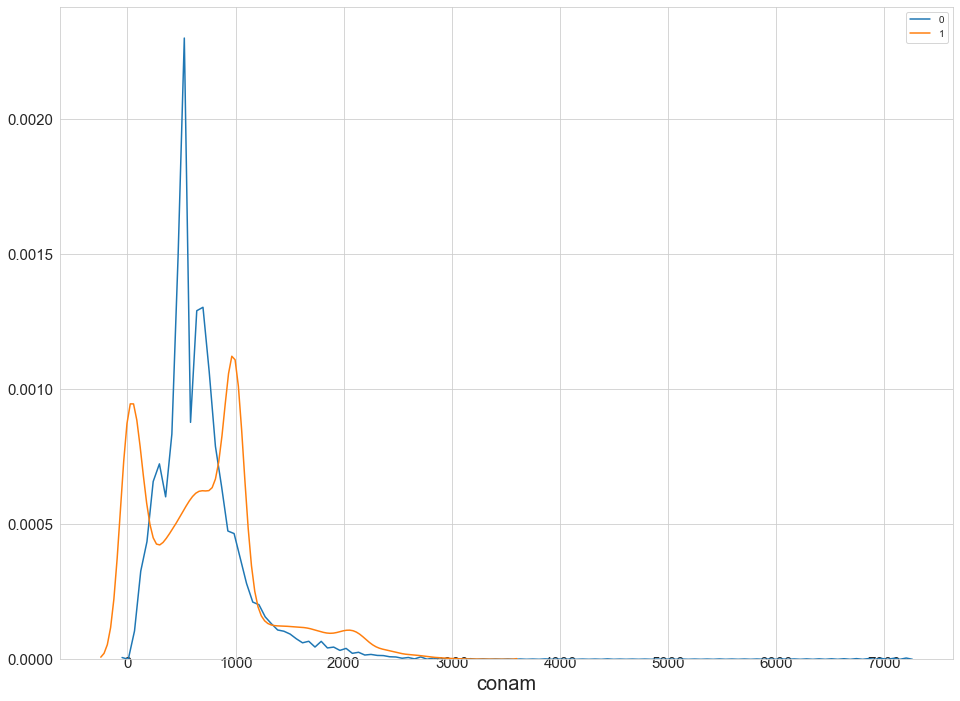

<Figure size 432x288 with 0 Axes>

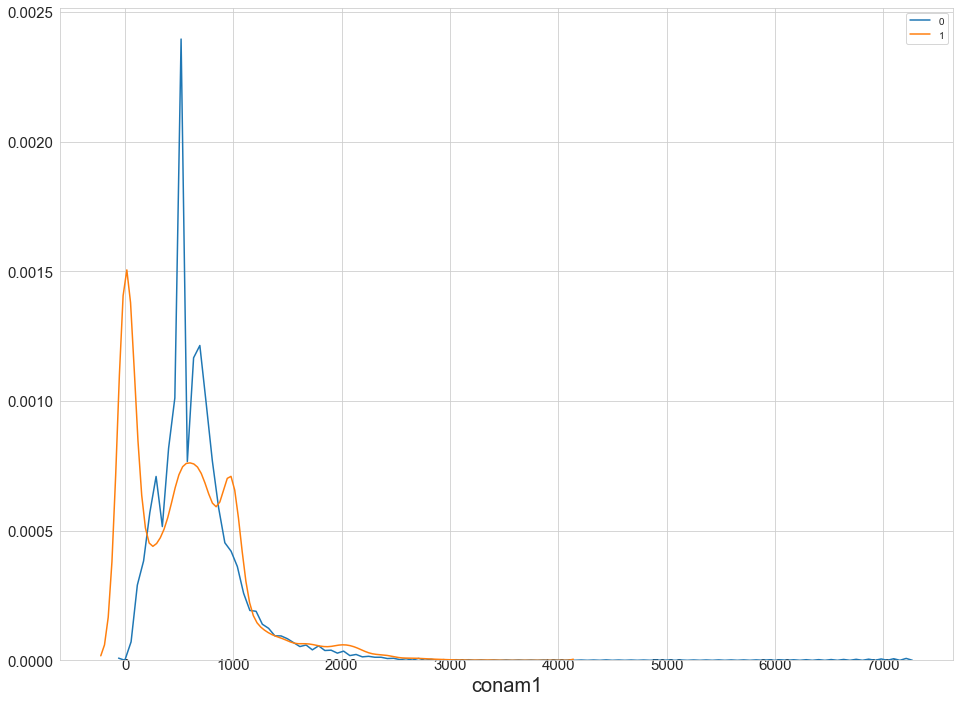

<Figure size 432x288 with 0 Axes>

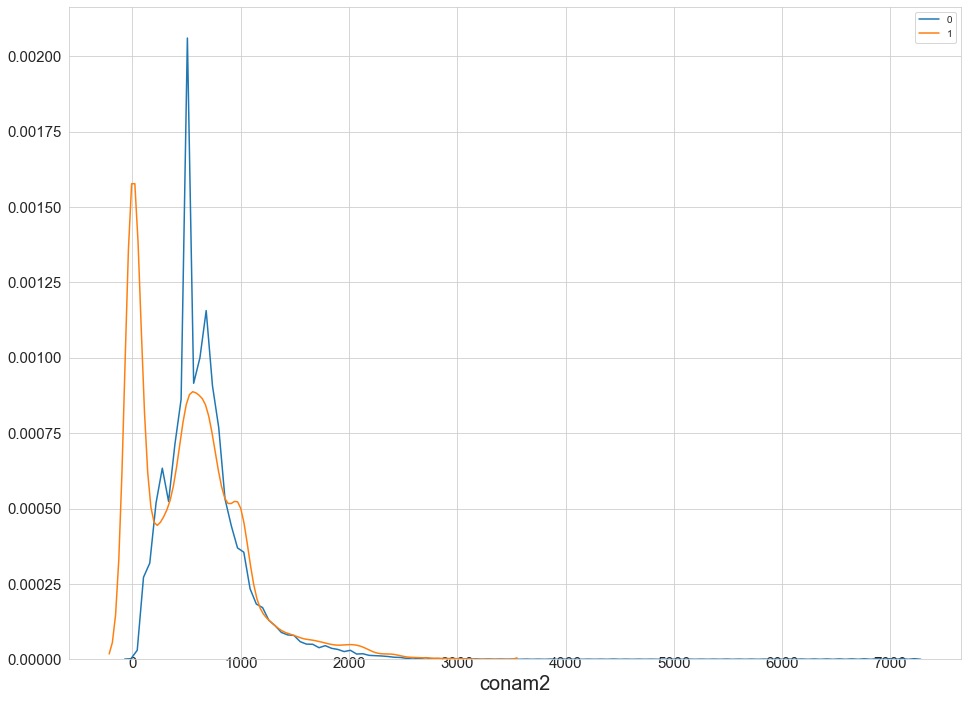

<Figure size 432x288 with 0 Axes>

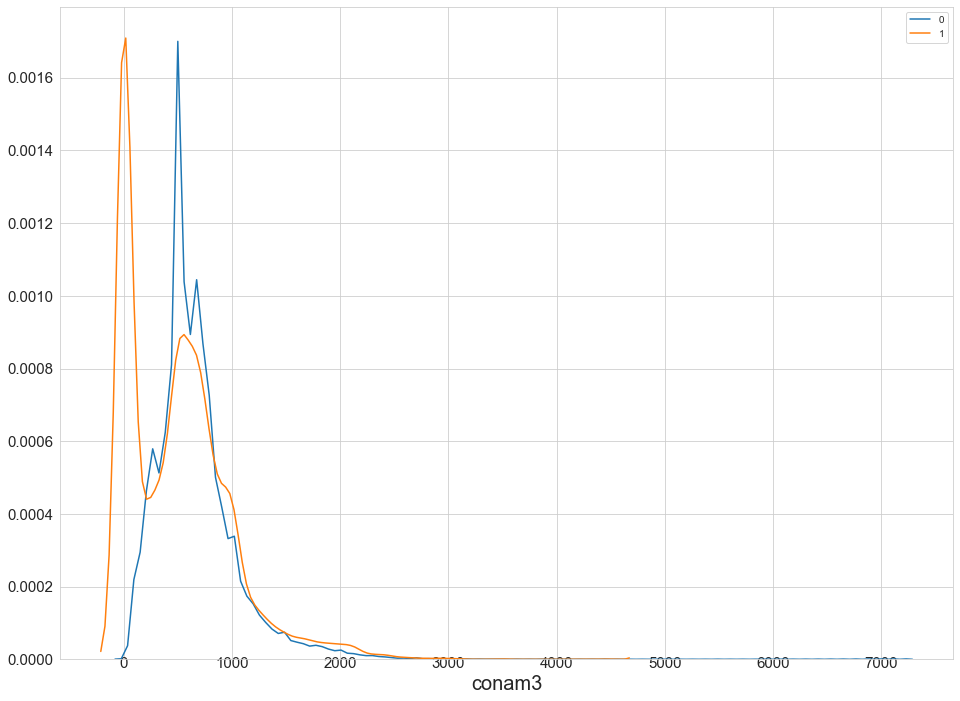

In [12]:
for feature in df0.columns[0:10]:
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(1,1,figsize=(16,12))

    sns.distplot(df0[feature], hist=False,label='0')
    sns.distplot(df1[feature], hist=False,label='1')
    plt.xlabel(feature, fontsize=20)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=15, pad=-6)
    plt.tick_params(axis='y', which='major', labelsize=15)
    plt.show()